In [ ]:
!pip install igraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.2 MB 5.2 MB/s 


In [ ]:
import igraph as ig
import matplotlib.pyplot as plt
import numpy as np

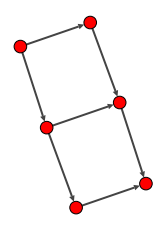

In [ ]:
graph = ig.Graph([(0,1),(0,3),(1,2),(2,5),(3,4),(3,2),(4,5)], directed = True)

graph.es()['custo'] = [20,10,30,20,15,10,20]

graph.es()['weight'] = [50,40,60,30,60,70,50]

graph.vs()['nome'] = ['s', 'a', 'b', 'c', 'd','t']

ig.plot(graph, target=plt.axes())
plt.axis('off')
plt.show()

In [ ]:
def ford_fulkerson(f_graph, source, target):
  graph = f_graph.copy()
  while(len(graph.get_all_simple_paths(v = source, to = target)) > 0): # Se a distancia retornar inf, para
    path = graph.get_all_simple_paths(v = source, to = target)[0] # Usar o bellman
    edges = [(path[x], path[x+1]) for x in range(len(path) - 1)]

    min_flux = np.inf; min_edge = tuple()
    for edge in edges:
      if min_flux > graph.es().select(_source = edge[0], _target = edge[1])['weight'][0]:
        min_flux = graph.es().select(_source = edge[0], _target = edge[1])['weight'][0]
        min_edge = (edge[0], edge[1])

    for edge in edges:
      if edge == min_edge:
        graph.delete_edges(edge)
        graph.add_edge(source = edge[1], target = edge[0])
        graph.es[-1]['weight'] = min_flux # Custo da menor fica negativo
        continue
      
      wt_e = graph.es().select(_source = edge[0], _target = edge[1])['weight'][0]
      graph.delete_edges(edge)
      graph.add_edge(source = edge[0], target = edge[1])
      graph.es[-1]['weight'] = wt_e - min_flux # Aresta de volta é negativa
      graph.add_edge(source = edge[1], target = edge[0])
      graph.es[-1]['weight'] = min_flux

  cut = 0
  incidents = graph.neighbors(target, mode="out")
  for v in incidents:
    cut += graph.es().select(_source = target, _target = v)['weight'][0]

  # Custo x distancia data
  return cut

In [ ]:
ford_fulkerson(graph, 0, 5)

70